# Project 2: The Dijkstra's Algorithm

In [ ]:
import csv
import heapq
import json
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
import random
import time

In [ ]:
CALCULATE_DATA = True
SHOW_SHORTEST_PATHS = True

In [ ]:
def generate_random_graph(num_nodes, edge_prob=0.75, weight_range=(1, 1000)):
    adj_matrix = np.zeros((num_nodes, num_nodes), dtype=int)
    adj_list = {i: [] for i in range(num_nodes)}

    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if random.random() < edge_prob:
                weight_ij = random.randint(*weight_range)
                weight_ji = random.randint(*weight_range)
                adj_matrix[i][j] = weight_ij
                adj_matrix[j][i] = weight_ji
                adj_list[i].append((j, weight_ij))
                adj_list[j].append((i, weight_ji))

    return {"adj_matrix": adj_matrix, "adj_lists": adj_list}

example_graph = generate_random_graph(5)
start_node = 0

(a) Suppose the input graph G = (V, E) is stored in an adjacency matrix and we
use an array for the priority queue. Implement the Dijkstra's algorithm using this setting and analyze its time complexity with respect to |V| and |E| both
theoretically and empirically.

In [ ]:
def dijkstra_a(adj_matrix, start):
    V = len(adj_matrix)
    dist = [float('inf')] * V
    prev = [None] * V
    visited = [False] * V
    dist[start] = 0

    start_time = time.time()

    for _ in range(V):
        min_dist = float('inf')
        u = None
        for v in range(V):
            if not visited[v] and dist[v] < min_dist:
                min_dist = dist[v]
                u = v

        if u is None:
            break

        visited[u] = True

        for v in range(V):
            if adj_matrix[u][v] > 0 and not visited[v]:
                new_dist = dist[u] + adj_matrix[u][v]
                if new_dist < dist[v]:
                    dist[v] = new_dist
                    prev[v] = u

    shortest_paths = None
    if SHOW_SHORTEST_PATHS:
      shortest_paths = {i: [] for i in range(V)}
      for i in range(V):
          if dist[i] < float('inf') and i != start:
              path = []
              curr = i
              while curr is not None:
                  path.append(curr)
                  curr = prev[curr]
              shortest_paths[i] = path[::-1]

    end_time = time.time()
    execution_time = end_time - start_time

    return dist, shortest_paths, execution_time

Distances: [0, 439, 465, 192, 628]
Shortest Paths:
{
    "0": [],
    "1": [
        0,
        3,
        1
    ],
    "2": [
        0,
        3,
        2
    ],
    "3": [
        0,
        3
    ],
    "4": [
        0,
        3,
        1,
        4
    ]
}
Execution Time: 0.0004100799560546875


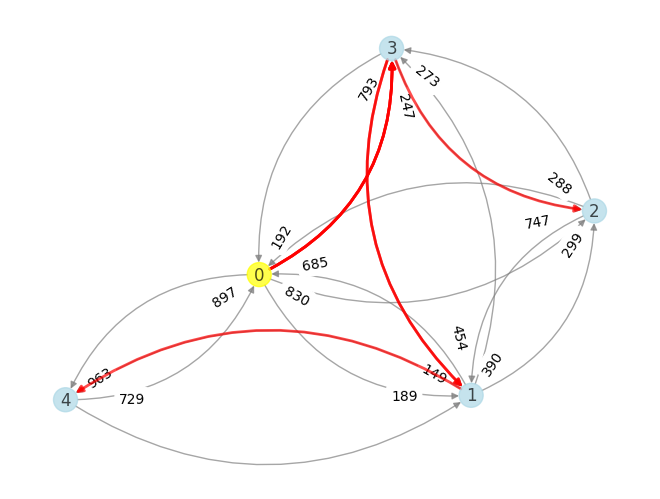

In [ ]:
def visualize_graph_a(adj_matrix, shortest_paths, start):
    G = nx.MultiDiGraph()
    num_nodes = len(adj_matrix)
    for u in range(num_nodes):
        for v in range(u + 1, num_nodes):
            weight_ij = adj_matrix[u][v]
            weight_ji = adj_matrix[v][u]
            if weight_ij > 0:
                G.add_edge(u, v, weight=weight_ij)
            if weight_ji > 0:
                G.add_edge(v, u, weight=weight_ji)

    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')

    node_colors = ['yellow' if node == start else 'lightblue' for node in G.nodes()]

    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', alpha=0.7, arrows=True, connectionstyle="arc3,rad=0.33")

    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, label_pos=0.15)

    for target, path in shortest_paths.items():
        if path:
            edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
            nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='red', width=2, alpha=0.7, arrows=True, connectionstyle="arc3,rad=0.33")

    plt.show()

dist_a, shortest_paths_a, execution_time_a = dijkstra_a(example_graph["adj_matrix"], start_node)
print("Distances:", dist_a)
print("Shortest Paths:")
print(json.dumps(shortest_paths_a, indent=4))
print("Execution Time:", execution_time_a)
visualize_graph_a(example_graph["adj_matrix"], shortest_paths_a, start_node)


(b) Suppose the input graph G = (V, E) is stored in an array of adjacency lists and we use a minimizing heap for the priority queue. Implement the Dijkstra's algorithm using this setting and analyze its time complexity with respect to |V| and |E| both theoretically and empirically.


In [ ]:
def dijkstra_b(adj_list, start):
    V = len(adj_list)
    dist = {i: float('inf') for i in range(V)}
    prev = {i: None for i in range(V)}
    dist[start] = 0

    pq = [(0, start)]

    start_time = time.time()

    while pq:
        current_dist, u = heapq.heappop(pq)

        if current_dist > dist[u]:
            continue

        for v, weight in adj_list[u]:
            new_dist = dist[u] + weight
            if new_dist < dist[v]:
                dist[v] = new_dist
                prev[v] = u
                heapq.heappush(pq, (new_dist, v))

    shortest_paths = None
    if SHOW_SHORTEST_PATHS:
      shortest_paths = {i: [] for i in range(V)}
      for i in range(V):
          if dist[i] < float('inf'):
              path = []
              node = i
              while node is not None:
                  path.append(node)
                  node = prev[node]
              shortest_paths[i] = path[::-1]

    end_time = time.time()
    execution_time = end_time - start_time

    return dist, shortest_paths, execution_time

Distances: {0: 0, 1: 439, 2: 465, 3: 192, 4: 628}
Shortest Paths:
{
    "0": [
        0
    ],
    "1": [
        0,
        3,
        1
    ],
    "2": [
        0,
        3,
        2
    ],
    "3": [
        0,
        3
    ],
    "4": [
        0,
        3,
        1,
        4
    ]
}
Execution Time: 4.1961669921875e-05


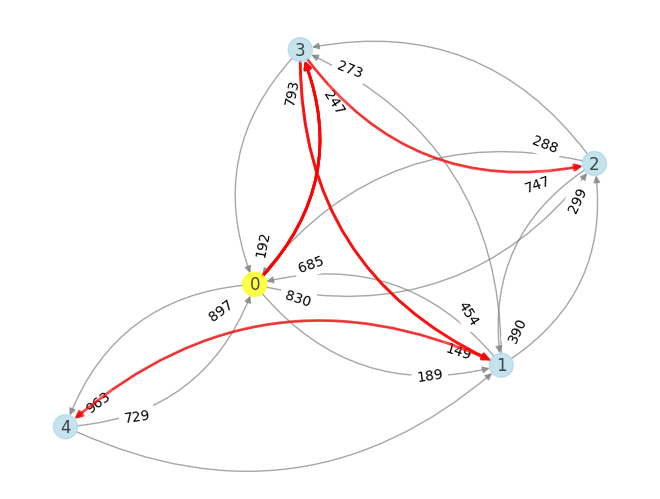

In [ ]:
def visualize_graph_b(adj_list, shortest_paths, start):
    G = nx.MultiDiGraph()

    for u in adj_list:
        for v, weight in adj_list[u]:
            G.add_edge(u, v, weight=weight)

    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')

    node_colors = ['yellow' if node == start else 'lightblue' for node in G.nodes()]

    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', alpha=0.7, arrows=True, connectionstyle="arc3,rad=0.33")

    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, label_pos=0.15)

    for target, path in shortest_paths.items():
        if path:
            edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
            nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='red', width=2, alpha=0.7, arrows=True, connectionstyle="arc3,rad=0.33")

    plt.show()

dist_b, shortest_paths_b, execution_time_b = dijkstra_b(example_graph["adj_lists"], start_node)
print("Distances:", dist_b)
print("Shortest Paths:")
print(json.dumps(shortest_paths_b, indent=4))
print("Execution Time:", execution_time_b)
visualize_graph_b(example_graph["adj_lists"], shortest_paths_b, start_node)

(c) Compare the two implementations in (a) and (b). Discuss which implementation is better and in what circumstances.

In [ ]:
V_values = [10**i for i in range(0, 4)] + [50, 250, 500, 750, 2000]
edge_prob = 0.5
rows = []
CSV_NAME_V = 'execution_time_vs_V_edges_algorithms.csv'


if CALCULATE_DATA:
  for V in V_values:
      for _ in range(10):
          graph = generate_random_graph(V, edge_prob)
          start_node = 0
          num_edges = np.sum(graph['adj_matrix'] > 0) // 2

          _, _, exec_time_a = dijkstra_a(graph['adj_matrix'], start_node)
          rows.append([exec_time_a, V, num_edges, 'dijkstra_a'])

          _, _, exec_time_b = dijkstra_b(graph['adj_lists'], start_node)
          rows.append([exec_time_b, V, num_edges, 'dijkstra_b'])

  with open(CSV_NAME_V, 'w', newline='') as file:
      writer = csv.writer(file)
      writer.writerow(["Execution Time (seconds)", "V", "E", "Algorithm"])
      writer.writerows(rows)

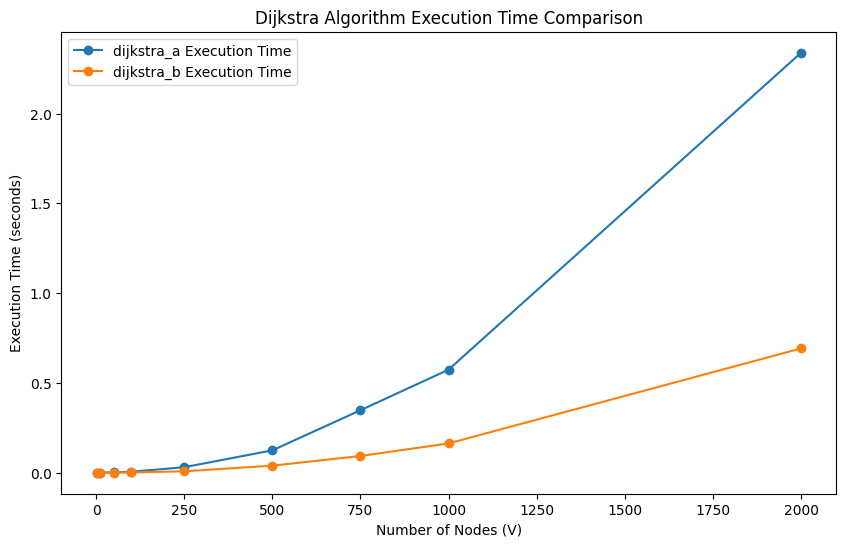

In [ ]:
df_v = pd.read_csv(f"./{CSV_NAME_V}")

df_v = df_v.groupby(['V', 'Algorithm']).agg({'Execution Time (seconds)': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
for algo in ['dijkstra_a', 'dijkstra_b']:
    subset = df_v[df_v['Algorithm'] == algo]
    plt.plot(subset['V'], subset['Execution Time (seconds)'], label=f'{algo} Execution Time', marker='o')

plt.xlabel("Number of Nodes (V)")
plt.ylabel("Execution Time (seconds)")
plt.title("Dijkstra Algorithm Execution Time Comparison")
plt.legend()
plt.show()

The execution time is plotted against the number of Nodes (V)

Observation
- The adjacency matrix with array priority queue *shows* a sharp rise in execution time as the number of nodes grows due to the O(V^2) complexity.
- The adjacency list with a min-heap grows more gradually, indicating its superior efficiency.


In [ ]:
V = 250
edge_probs = [0.1*i for i in range(1,10)]
execution_times_a = []
execution_times_b = []
CSV_NAME_E = 'execution_time_vs_edge_density_algorithms.csv'

if CALCULATE_DATA:
  for edge_prob in edge_probs:
      for _ in range(50):
          graph = generate_random_graph(V, edge_prob)
          start_node = 0
          num_edges = np.sum(graph['adj_matrix'] > 0) // 2

          _, _, exec_time_a = dijkstra_a(graph['adj_matrix'], start_node)
          execution_times_a.append([edge_prob, num_edges, exec_time_a, 'dijkstra_a'])

          _, _, exec_time_b = dijkstra_b(graph['adj_lists'], start_node)
          execution_times_b.append([edge_prob, num_edges, exec_time_b, 'dijkstra_b'])

  all_execution_times = execution_times_a + execution_times_b

  with open(CSV_NAME_E, 'w', newline='') as file:
      writer = csv.writer(file)
      writer.writerow(["Edge Probability", "E", "Execution Time (seconds)", "Algorithm"])
      writer.writerows(all_execution_times)

,Edge Probability,Algorithm,Execution Time (seconds),E
0,0.1,dijkstra_a,0.045435,3116.0
1,0.1,dijkstra_b,0.003232,3116.0
2,0.2,dijkstra_a,0.027291,6219.0
3,0.2,dijkstra_b,0.004113,6219.0
4,0.3,dijkstra_a,0.028110,9318.0
5,0.3,dijkstra_b,0.005943,9318.0
6,0.4,dijkstra_a,0.029298,12453.0
7,0.4,dijkstra_b,0.007432,12453.0
8,0.5,dijkstra_a,0.040226,15549.0
9,0.5,dijkstra_b,0.010714,15549.0


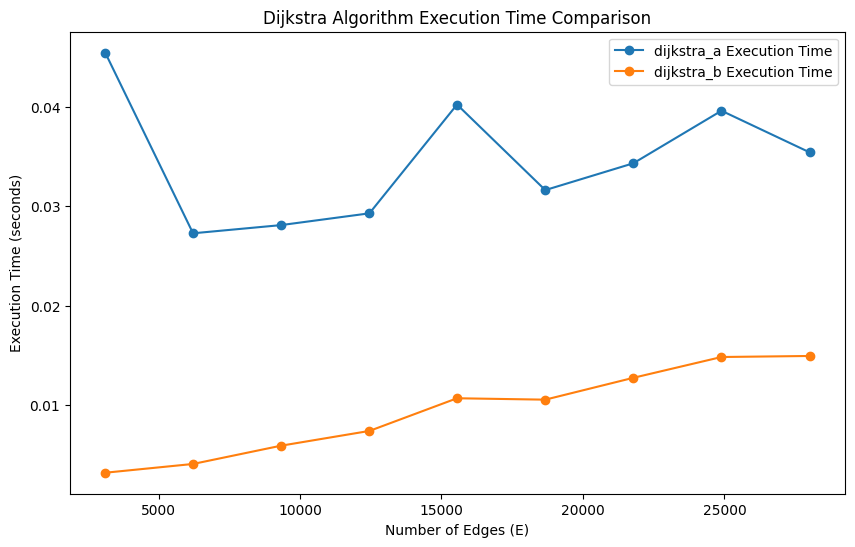

In [ ]:
df_e = pd.read_csv(CSV_NAME_E)

df_e = df_e.groupby(['Edge Probability', 'Algorithm']).agg({'Execution Time (seconds)': 'mean', 'E': 'mean'}).reset_index()
df_e["E"] = df_e["E"].round(0)

plt.figure(figsize=(10, 6))
for algo in ['dijkstra_a', 'dijkstra_b']:
    subset = df_e[df_e['Algorithm'] == algo]
    plt.plot(subset['E'], subset['Execution Time (seconds)'], label=f'{algo} Execution Time', marker='o')

display(df_e)

plt.xlabel("Number of Edges (E)")
plt.ylabel("Execution Time (seconds)")
plt.title("Dijkstra Algorithm Execution Time Comparison")
plt.legend()
plt.show()

The execution time is plotted against the number of edges (E)

Observations
- in sparse graph, The adjacency list with a min-heap (𝑂((𝑉+𝐸)log 𝑉)) scales much better
- For Dense graphs, the time complexity of The adjacency matrix with an array priority queue improves